In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_raw = pd.read_csv("titanic_kaggle.csv")
df_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df = df_raw.copy()
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
df.set_index(["PassengerId"],inplace=True)
df.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
806,0,3,"Johansson, Mr. Karl Johan",male,31.0,0,0,347063,7.7750,NaN,S
715,0,2,"Greenberg, Mr. Samuel",male,52.0,0,0,250647,13.0000,NaN,S
681,0,3,"Peters, Miss. Katie",female,NaN,0,0,330935,8.1375,NaN,Q
398,0,2,"McKane, Mr. Peter David",male,46.0,0,0,28403,26.0000,NaN,S
666,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.5000,NaN,S


In [10]:
df.shape

(891, 11)

In [11]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 108.9+ KB


In [13]:
# name is not an importent column so removing it
df.drop("Name",axis=1,inplace=True)

In [15]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [17]:
# as we obsere there are more number of null values in the cabin column 
# so we are removing the cabin column from the df
df.drop("Cabin",axis=1,inplace=True)

In [19]:
# Now replacing the null values of an age column with median age
age=df["Age"].median()
df["Age"].fillna(age,inplace=True)
df["Embarked"].bfill(inplace=True)

In [21]:
df["Ticket"].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [23]:
# the ticket feature in this data set does not effect any thing so it is better to remove it from the df
df.drop("Ticket",axis=1,inplace=True)

In [24]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [55]:
# Counting the no of different gender groups in the data
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

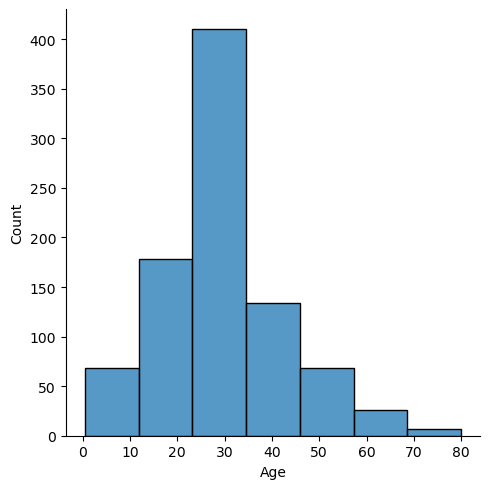

In [70]:
# Distribution of Age
sns.displot(x="Age",data=df,bins=7)
plt.show()

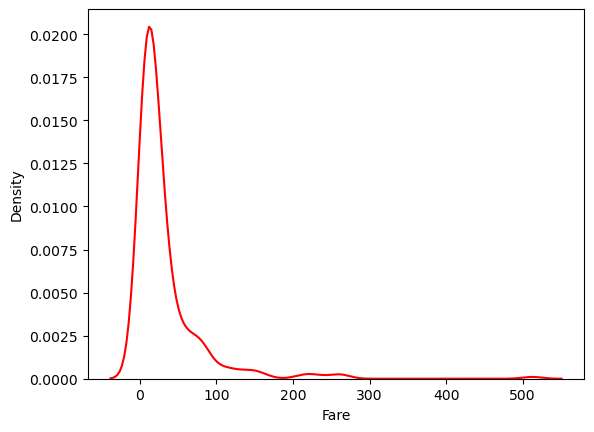

In [71]:
sns.kdeplot(x="Fare",data=df,color="red")
plt.show()

Text(0.5, 1.0, 'Distribution of Gender')

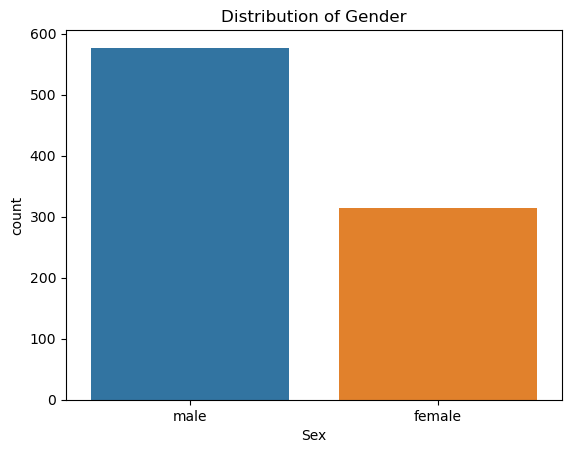

In [57]:
# visualizing the distribution of gender 
sns.countplot(x="Sex",data=df).set_title("Distribution of Gender")

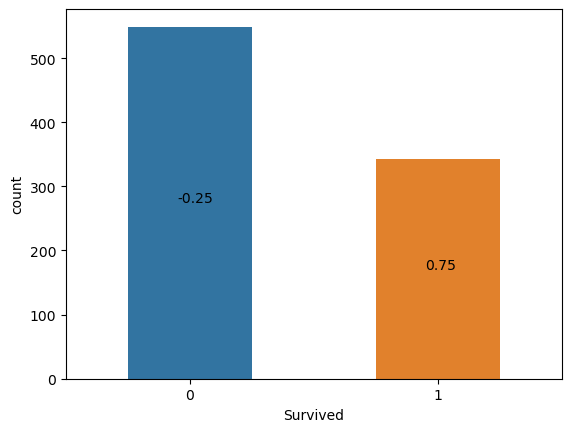

In [99]:
ax=sns.countplot(x="Survived",data=df,width=0.5)
for i in ax.patches:
    y=i.get_height()/2
    x=i.get_x()
    ax.annotate(x,(x+0.2,y+0.3))

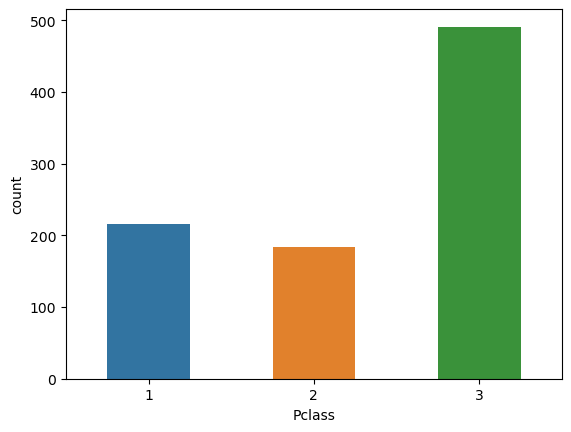

In [81]:
ax=sns.countplot(x="Pclass",data=df,width=0.5)


In [82]:
ax

<Axes: xlabel='Pclass', ylabel='count'>

In [83]:
ax.patches

<Axes.ArtistList of 3 patches>

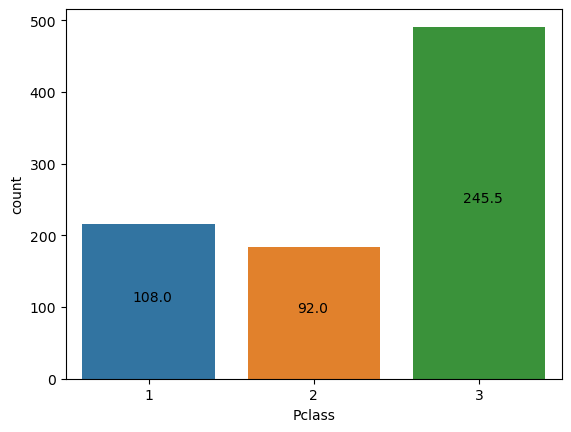

In [100]:
ax=sns.countplot(x="Pclass",data=df)
for i in ax.patches:
    y=i.get_height()/2
    x=i.get_x()
    ax.annotate(y,(x+0.3,y+0.5))

In [101]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
